In [1]:
from itertools import cycle

import numpy as np
from glob import glob
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


# Get trainticket paths
paths = glob('data/trainticket/*.csv')

# Shuffle the paths
np.random.seed(42)
np.random.shuffle(paths)

# Create a cycle iterator
iterator = cycle(paths)

# Initialize the result dictionary
results = {'train_set': [], 'test_set': [], 'f1': []}


for train_path in iterator:
    # Get test path
    test_path = next(iterator)

    # Get training set name
    train_set = train_path.split('/')[-1].split('.')[0]

    # Get test set name
    test_set = test_path.split('/')[-1].split('.')[0]

    # Read train and test data
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)

    # Extract features and labels
    X_train = df_train.iloc[:, :-1]
    y_train = df_train.iloc[:, -1]
    X_test = df_test.iloc[:, :-1]
    y_test = df_test.iloc[:, -1]

    # Train a Decision Tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate F1 score (average='weighted' to deal with class imbalance)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append the result to the dictionary
    results['train_set'].append(train_set)
    results['test_set'].append(test_set)
    results['f1'].append(weighted_f1)

    # Stop if all the train sets have been used
    if len(results['f1']) == len(paths):
        break


# Create a dataframe from the results
df_results = pd.DataFrame(results)



In [2]:
df_results

,train_set,test_set,f1
0,023,097,0.729977
1,189,007,0.716558
2,249,182,0.851781
3,085,066,0.769080
4,132,063,0.766302
...,...,...,...
275,094,265,0.863806
276,118,206,0.756400
277,234,065,0.731696
278,031,120,0.732340


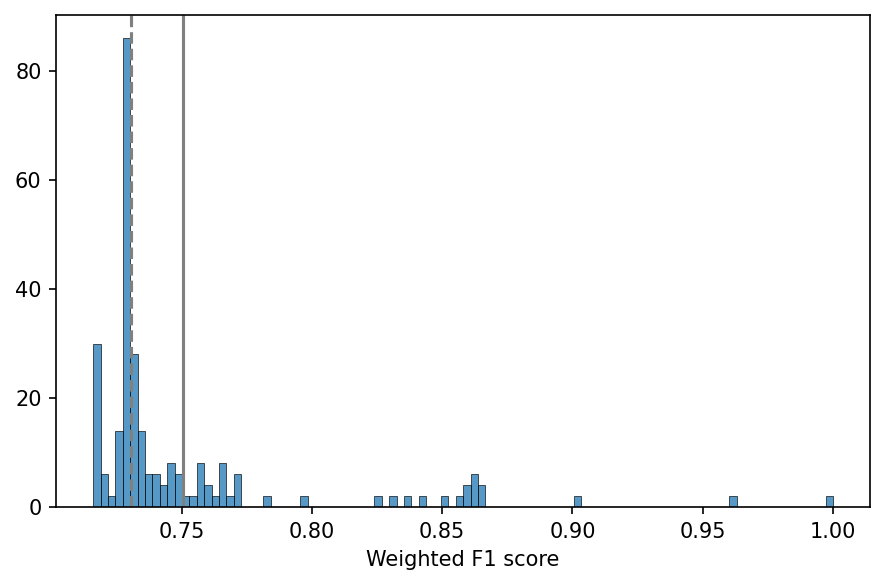

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


# Adjust dpi resolution and figure size
plt.rcParams['figure.dpi'] = 150

fig, ax = plt.subplots(figsize=(6, 4))

# Plot ARI distribution for each case study
sns.histplot(data=df_results, x='f1', bins=100, ax=ax)


# Plot mean and median ARI
ax.axvline(x=df_results.f1.mean(), color='grey', linestyle='-')
ax.axvline(x=df_results.f1.median(), color='grey', linestyle='--')

# Display the plot
ax.set_xlabel('Weighted F1 score')
ax.set_ylabel('')

plt.tight_layout()
plt.show()
